In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections import Counter

In [3]:
# Config(tried with different hyper parameters and observed the output)
image_size = 224
batch_size = 32
num_epochs = 25
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rates = {
    "mobilenet": 0.0001,
    "efficientnet": 0.001,
    "resnet": 0.001,
    "densenet": 0.003,
}

In [4]:
# Transformations
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [5]:
# Load dataset
data_dir = "/kaggle/input/skin-tone-classification-dataset/train"
dataset = datasets.ImageFolder(data_dir, transform=transform)
class_names = dataset.classes

In [6]:
# Visualize class distribution
def plot_class_distribution(dataset, class_names):
    labels = [label for _, label in dataset]
    counts = Counter(labels)
    plt.figure(figsize=(8, 5))
    plt.bar([class_names[i] for i in counts.keys()], counts.values(), color="skyblue")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title("Class Distribution in Dataset")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

In [7]:
# Visualize sample images
def show_class_samples(dataset, class_names, samples_per_class=3):
    class_indices = {class_id: [] for class_id in range(len(class_names))}
    for i, (img, label) in enumerate(dataset):
        if len(class_indices[label]) < samples_per_class:
            class_indices[label].append(img)
        if all(len(v) >= samples_per_class for v in class_indices.values()):
            break

    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(samples_per_class * 3, len(class_names) * 3))
    for class_id, imgs in class_indices.items():
        for i, img in enumerate(imgs):
            img_np = img.permute(1, 2, 0).numpy()
            img_np = img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
            img_np = np.clip(img_np, 0, 1)
            ax = axes[class_id, i] if len(class_names) > 1 else axes[i]
            ax.imshow(img_np)
            ax.axis("off")
            if i == 0:
                ax.set_title(class_names[class_id], fontsize=12)
    plt.suptitle("Sample Images per Class")
    plt.tight_layout()
    plt.show()

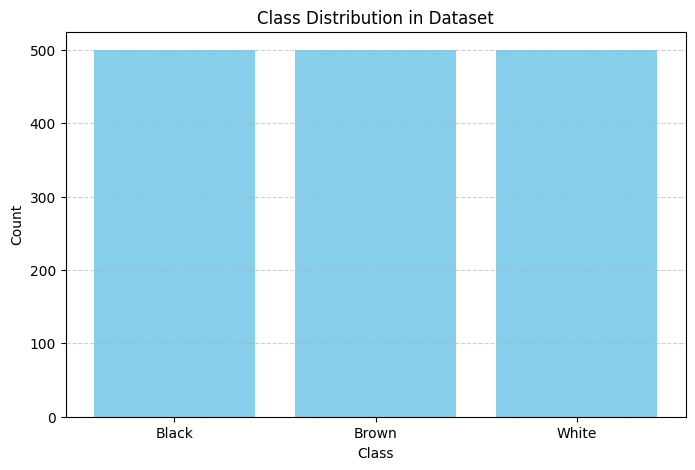

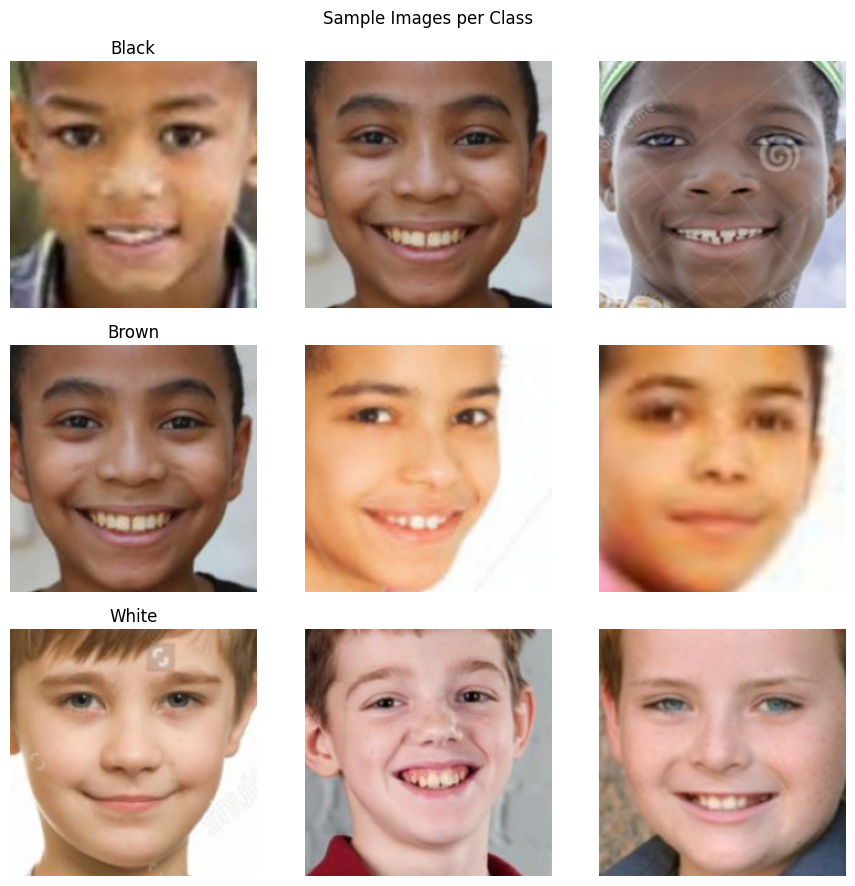

In [8]:
# Display data visualizations
plot_class_distribution(dataset, class_names)
show_class_samples(dataset, class_names)

In [9]:
# Split dataset
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [10]:
# Model loader
def get_model(model_name):
    if model_name == "mobilenet":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, 3)
    elif model_name == "efficientnet":
        model = models.efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, 3)
    elif model_name == "resnet":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 3)
    elif model_name == "densenet":
        model = models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 3)
    else:
        raise ValueError("Unsupported model.")
    return model.to(device)


--- Training MOBILENET ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[mobilenet] Epoch 1/25 => Train Acc: 0.6924, Val Acc: 0.8133
[mobilenet] Epoch 2/25 => Train Acc: 0.9076, Val Acc: 0.8667
[mobilenet] Epoch 3/25 => Train Acc: 0.9657, Val Acc: 0.8711
[mobilenet] Epoch 4/25 => Train Acc: 0.9800, Val Acc: 0.8844
[mobilenet] Epoch 5/25 => Train Acc: 0.9848, Val Acc: 0.8622
[mobilenet] Epoch 6/25 => Train Acc: 0.9819, Val Acc: 0.8756
[mobilenet] Epoch 7/25 => Train Acc: 0.9829, Val Acc: 0.8889
[mobilenet] Epoch 8/25 => Train Acc: 0.9895, Val Acc: 0.8800
[mobilenet] Epoch 9/25 => Train Acc: 0.9914, Val Acc: 0.8978
[mobilenet] Epoch 10/25 => Train Acc: 0.9876, Val Acc: 0.8800
[mobilenet] Epoch 11/25 => Train Acc: 0.9895, Val Acc: 0.8844
[mobilenet] Epoch 12/25 => Train Acc: 0.9895, Val Acc: 0.8844
[mobilenet] Epoch 13/25 => Train Acc: 0.9914, Val Acc: 0.8889
[mobilenet] Epoch 14/25 => Train Acc: 0.9905, Val Acc: 0.8889
[mobilenet] Epoch 15/25 => Train Acc: 0.9914, Val Acc: 0.8933
[mobilenet] Epoch 16/25 => Train Acc: 0.9914, Val Acc: 0.8889
[mobilenet] Epoch

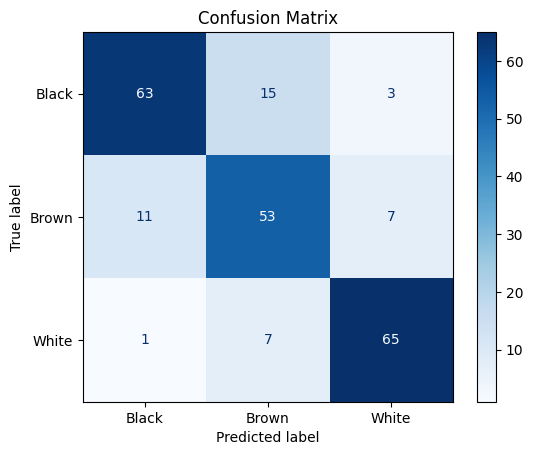

Classification Report:
              precision    recall  f1-score   support

       Black       0.84      0.78      0.81        81
       Brown       0.71      0.75      0.73        71
       White       0.87      0.89      0.88        73

    accuracy                           0.80       225
   macro avg       0.80      0.80      0.80       225
weighted avg       0.81      0.80      0.80       225


--- Training EFFICIENTNET ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[efficientnet] Epoch 1/25 => Train Acc: 0.7171, Val Acc: 0.7422
[efficientnet] Epoch 2/25 => Train Acc: 0.8762, Val Acc: 0.8578
[efficientnet] Epoch 3/25 => Train Acc: 0.9200, Val Acc: 0.8889
[efficientnet] Epoch 4/25 => Train Acc: 0.9429, Val Acc: 0.8711
[efficientnet] Epoch 5/25 => Train Acc: 0.9543, Val Acc: 0.8800
[efficientnet] Epoch 6/25 => Train Acc: 0.9638, Val Acc: 0.8533
[efficientnet] Epoch 7/25 => Train Acc: 0.9629, Val Acc: 0.9022
[efficientnet] Epoch 8/25 => Train Acc: 0.9676, Val Acc: 0.9022
[efficientnet] Epoch 9/25 => Train Acc: 0.9619, Val Acc: 0.8356
[efficientnet] Epoch 10/25 => Train Acc: 0.9610, Val Acc: 0.9022
[efficientnet] Epoch 11/25 => Train Acc: 0.9790, Val Acc: 0.8933
[efficientnet] Epoch 12/25 => Train Acc: 0.9667, Val Acc: 0.8844
[efficientnet] Epoch 13/25 => Train Acc: 0.9848, Val Acc: 0.8978
[efficientnet] Epoch 14/25 => Train Acc: 0.9848, Val Acc: 0.9022
[efficientnet] Epoch 15/25 => Train Acc: 0.9733, Val Acc: 0.8622
[efficientnet] Epoch 16/25 => Trai

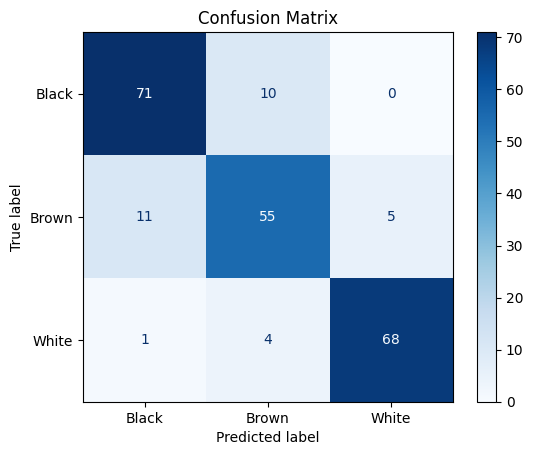

Classification Report:
              precision    recall  f1-score   support

       Black       0.86      0.88      0.87        81
       Brown       0.80      0.77      0.79        71
       White       0.93      0.93      0.93        73

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225


--- Training RESNET ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[resnet] Epoch 1/25 => Train Acc: 0.7105, Val Acc: 0.7733
[resnet] Epoch 2/25 => Train Acc: 0.8533, Val Acc: 0.8489
[resnet] Epoch 3/25 => Train Acc: 0.9114, Val Acc: 0.8533
[resnet] Epoch 4/25 => Train Acc: 0.9238, Val Acc: 0.8267
[resnet] Epoch 5/25 => Train Acc: 0.9381, Val Acc: 0.8667
[resnet] Epoch 6/25 => Train Acc: 0.9686, Val Acc: 0.7778
[resnet] Epoch 7/25 => Train Acc: 0.9590, Val Acc: 0.8622
[resnet] Epoch 8/25 => Train Acc: 0.9552, Val Acc: 0.8311
[resnet] Epoch 9/25 => Train Acc: 0.9667, Val Acc: 0.8000
[resnet] Epoch 10/25 => Train Acc: 0.9733, Val Acc: 0.8667
[resnet] Epoch 11/25 => Train Acc: 0.9743, Val Acc: 0.7956
[resnet] Epoch 12/25 => Train Acc: 0.9590, Val Acc: 0.8844
[resnet] Epoch 13/25 => Train Acc: 0.9714, Val Acc: 0.8533
[resnet] Epoch 14/25 => Train Acc: 0.9648, Val Acc: 0.8711
[resnet] Epoch 15/25 => Train Acc: 0.9771, Val Acc: 0.8978
[resnet] Epoch 16/25 => Train Acc: 0.9867, Val Acc: 0.7911
[resnet] Epoch 17/25 => Train Acc: 0.9667, Val Acc: 0.8844
[resne

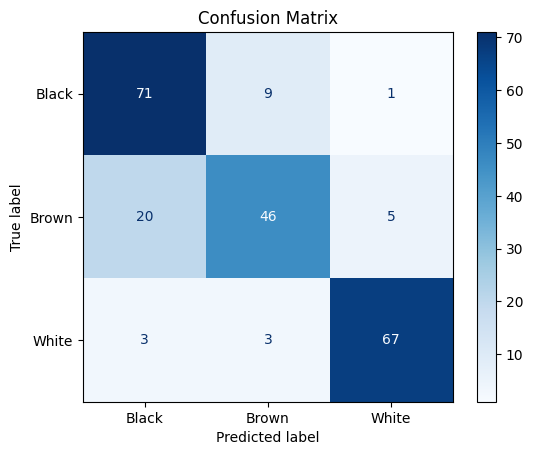

Classification Report:
              precision    recall  f1-score   support

       Black       0.76      0.88      0.81        81
       Brown       0.79      0.65      0.71        71
       White       0.92      0.92      0.92        73

    accuracy                           0.82       225
   macro avg       0.82      0.81      0.81       225
weighted avg       0.82      0.82      0.81       225


--- Training DENSENET ---


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[densenet] Epoch 1/25 => Train Acc: 0.6238, Val Acc: 0.6578
[densenet] Epoch 2/25 => Train Acc: 0.7067, Val Acc: 0.3289
[densenet] Epoch 3/25 => Train Acc: 0.7333, Val Acc: 0.7556
[densenet] Epoch 4/25 => Train Acc: 0.7590, Val Acc: 0.7378
[densenet] Epoch 5/25 => Train Acc: 0.7752, Val Acc: 0.8133
[densenet] Epoch 6/25 => Train Acc: 0.8210, Val Acc: 0.7956
[densenet] Epoch 7/25 => Train Acc: 0.8210, Val Acc: 0.7156
[densenet] Epoch 8/25 => Train Acc: 0.8286, Val Acc: 0.5467
[densenet] Epoch 9/25 => Train Acc: 0.8562, Val Acc: 0.8178
[densenet] Epoch 10/25 => Train Acc: 0.8552, Val Acc: 0.8089
[densenet] Epoch 11/25 => Train Acc: 0.8495, Val Acc: 0.7022
[densenet] Epoch 12/25 => Train Acc: 0.8552, Val Acc: 0.7778
[densenet] Epoch 13/25 => Train Acc: 0.8381, Val Acc: 0.8222
[densenet] Epoch 14/25 => Train Acc: 0.8733, Val Acc: 0.8356
[densenet] Epoch 15/25 => Train Acc: 0.8648, Val Acc: 0.8489
[densenet] Epoch 16/25 => Train Acc: 0.9000, Val Acc: 0.8356
[densenet] Epoch 17/25 => Train A

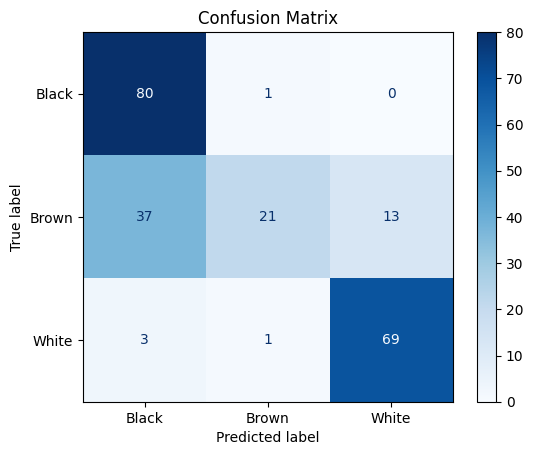

Classification Report:
              precision    recall  f1-score   support

       Black       0.67      0.99      0.80        81
       Brown       0.91      0.30      0.45        71
       White       0.84      0.95      0.89        73

    accuracy                           0.76       225
   macro avg       0.81      0.74      0.71       225
weighted avg       0.80      0.76      0.72       225



In [15]:
from sklearn.metrics import classification_report
# Train and evaluate
def train_and_evaluate(model, model_name, train_loader, val_loader, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_acc, val_acc = [], []
    train_loss, val_loss = [], []

    for epoch in range(num_epochs):
        # Train
        model.train()
        correct, total, running_loss = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        train_acc.append(correct / total)
        train_loss.append(running_loss / len(train_loader))

        # Validate
        model.eval()
        correct, total, running_loss = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        val_acc.append(correct / total)
        val_loss.append(running_loss / len(val_loader))

        print(f"[{model_name}] Epoch {epoch+1}/{num_epochs} => Train Acc: {train_acc[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}")

    # Save model
    torch.save(model, f"{model_name}_tone_model.pt")
    print(f"Model saved: {model_name}_tone_model.pt")

    return train_acc, val_acc, train_loss, val_loss

def evaluate(model, test_loader):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    correct = np.sum(np.array(y_pred) == np.array(y_true))
    total = len(y_true)
    return correct / total, report
    
for model_name in learning_rates.keys():
    print(f"\n--- Training {model_name.upper()} ---")
    model = get_model(model_name)
    lr = learning_rates[model_name]
    train_acc, val_acc, train_loss, val_loss = train_and_evaluate(model, model_name, train_loader, val_loader, lr)
    test_acc, report = evaluate(model, test_loader)

    results[model_name] = {
        "train_acc": train_acc,
        "val_acc": val_acc,
        "train_loss": train_loss,
        "val_loss": val_loss,
        "test_acc": test_acc,
        "report": report
    }

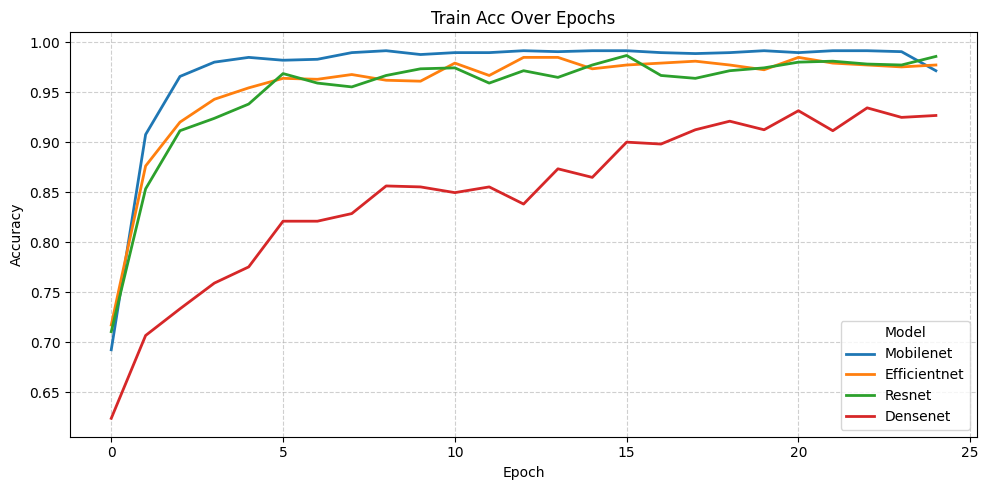

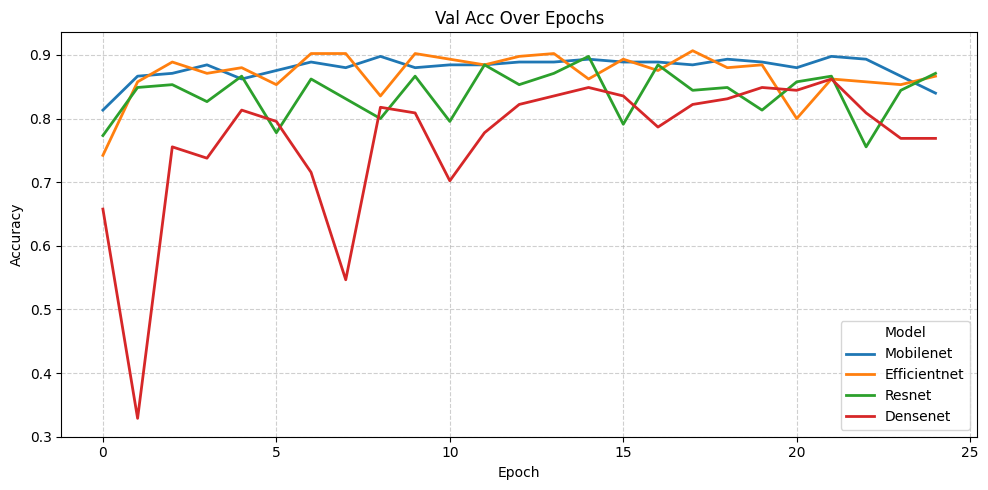

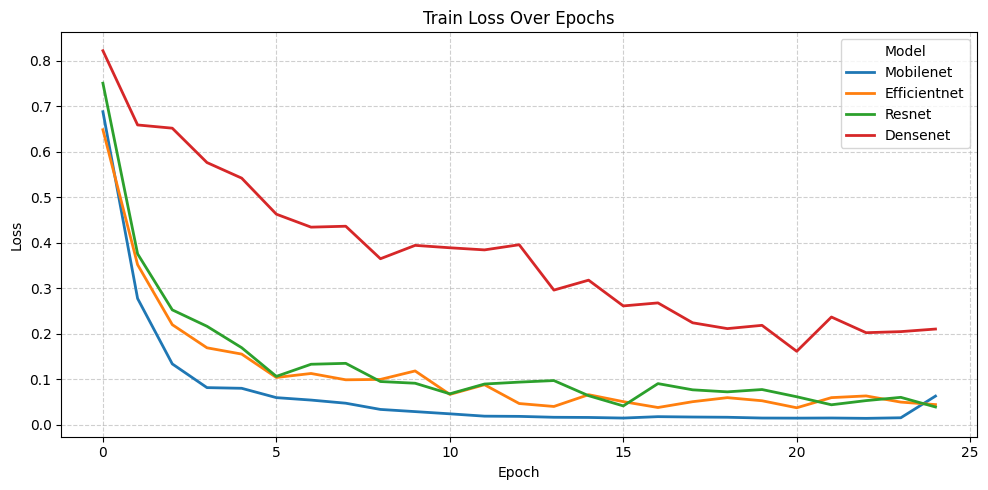

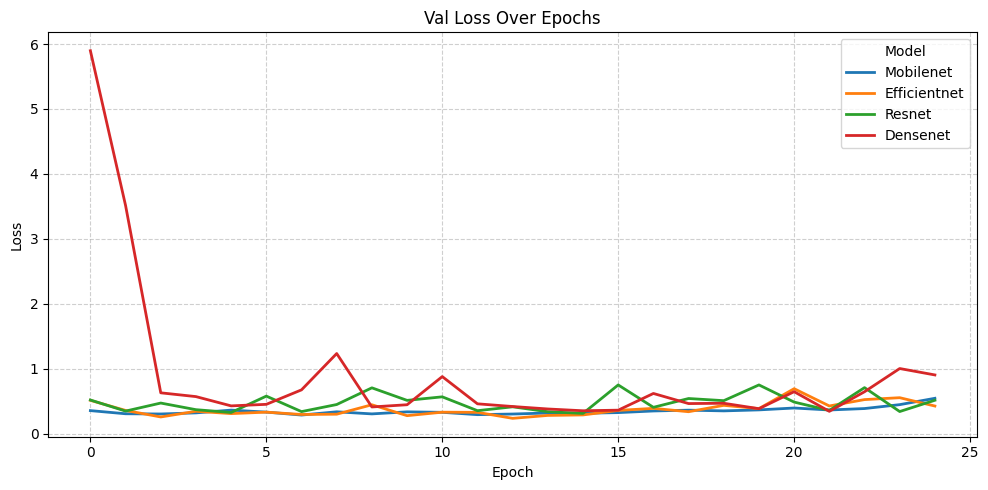

In [16]:
def plot_metric(metric_name, ylabel=None):
    plt.figure(figsize=(10, 5))
    for model_name in results:
        plt.plot(results[model_name][metric_name], label=model_name.capitalize(), linewidth=2)
    plt.title(f"{metric_name.replace('_', ' ').title()} Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel(ylabel if ylabel else metric_name.title())
    plt.legend(title="Model")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_metric("train_acc", "Accuracy")
plot_metric("val_acc", "Accuracy")
plot_metric("train_loss", "Loss")
plot_metric("val_loss", "Loss")


--- Test Accuracy Comparison ---
Mobilenet: Test Accuracy = 0.8044
Efficientnet: Test Accuracy = 0.8622
Resnet: Test Accuracy = 0.8178
Densenet: Test Accuracy = 0.7556


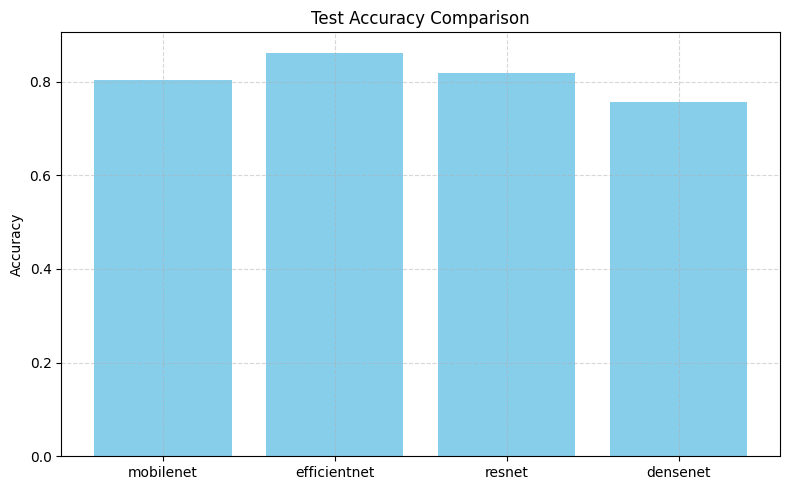

In [17]:
print("\n--- Test Accuracy Comparison ---")
for model_name, metrics in results.items():
    print(f"{model_name.capitalize()}: Test Accuracy = {metrics['test_acc']:.4f}")

plt.figure(figsize=(8, 5))
model_names = list(results.keys())
test_accuracies = [results[m]["test_acc"] for m in model_names]
plt.bar(model_names, test_accuracies, color='skyblue')
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# --- Find Best Model Based on Test Accuracy ---
best_model = max(results.items(), key=lambda x: x[1]["test_acc"])
best_model_name = best_model[0]
best_model_report = best_model[1]["report"]

print(f"\n Best Model: {best_model_name.capitalize()} with Test Accuracy = {best_model[1]['test_acc']:.4f}")
print("\n Classification Report for Best Model:\n")

# Print classification report
from sklearn.metrics import classification_report

for cls in class_names:
    r = best_model_report[cls]
    print(f"{cls:<10}  Precision: {r['precision']:.2f}  Recall: {r['recall']:.2f}  F1-score: {r['f1-score']:.2f}")

macro = best_model_report['macro avg']
print(f"\nMacro Avg   Precision: {macro['precision']:.2f}  Recall: {macro['recall']:.2f}  F1-score: {macro['f1-score']:.2f}")



 Best Model: Efficientnet with Test Accuracy = 0.8622

 Classification Report for Best Model:

Black       Precision: 0.86  Recall: 0.88  F1-score: 0.87
Brown       Precision: 0.80  Recall: 0.77  F1-score: 0.79
White       Precision: 0.93  Recall: 0.93  F1-score: 0.93

Macro Avg   Precision: 0.86  Recall: 0.86  F1-score: 0.86
